In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_data=pd.read_csv('MyDATAp.csv')

In [3]:
df_data

,ID,Name,Cuisine,Location,Alcohol,Smoking Area,Upayment,Review,Hours,Days,Praking,Cost of the order ($)
0,132560,Kiku Cuernavaca,Spanish,Revolucion,No_Alcohol_Served,none,cash,4.00,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;,none,30.75
1,132561,Puesto de tacos,Italian,esquina santos degollado y leon guzman,No_Alcohol_Served,none,cash,3.00,00:00-23:30;,Sat;,none,12.08
2,132564,El Rincón de San Francisco,Latin_American,Universidad 169,Wine-Beer,only at bar,cash,4.00,00:00-23:30;,Sun;,none,12.23
3,132572,little pizza Emilio Portes Gil,Mexican,calle emilio portes gil,No_Alcohol_Served,none,cash,2.50,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;,none,29.20
4,132583,carnitas_mata,Fast_Food,lic. Emilio portes gil,No_Alcohol_Served,permitted,bank_debit_cards,3.00,00:00-00:00;,Sat;,none,11.59
...,...,...,...,...,...,...,...,...,...,...,...,...
2023,1476701,Chipotle Mexican Grill $1.99 Delivery,Mexican,sevilla y olmedo 715 a,No_Alcohol_Served,none,cash,2.35,07:00-00:00;,Mon;Tue;Wed;Thu;Fri;,none,12.18
2024,1477421,The Smile,American,69 Tres De Mayo,No_Alcohol_Served,section,cash,4.60,07:00-00:00;,Sat;,public,14.99
2025,1477819,Blue Ribbon Sushi,Japanese,Ignacio Allende 785 Centro,Wine-Beer,not permitted,cash,4.25,13:00-20:00;,Mon;Tue;Wed;Thu;Fri;,yes,6.74
2026,1477513,Jack's Wife Freda,Mediterranean,blvrd emilio portes gil,No_Alcohol_Served,none,American_Express,2.75,13:00-20:00;,Mon;Tue;Wed;Thu;Fri;,none,24.30


<Axes: xlabel='Location'>

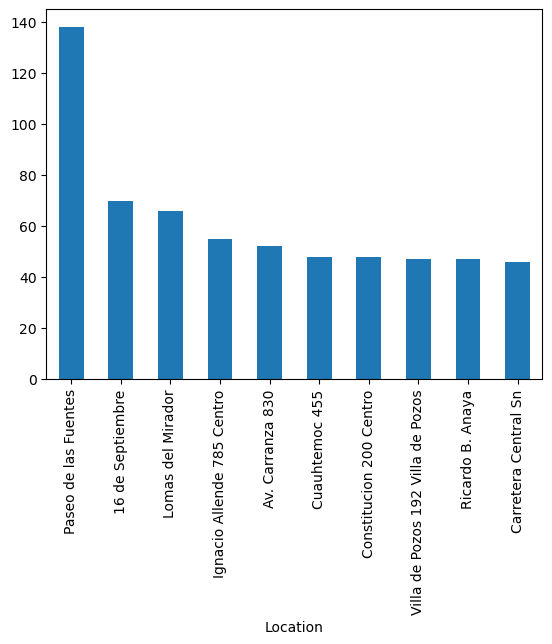

In [4]:
group = df_data.groupby('Location').size()
top_5_cities=group.sort_values(ascending=False).head(10)
top_5_cities.plot.bar()

<Axes: xlabel='Cuisine'>

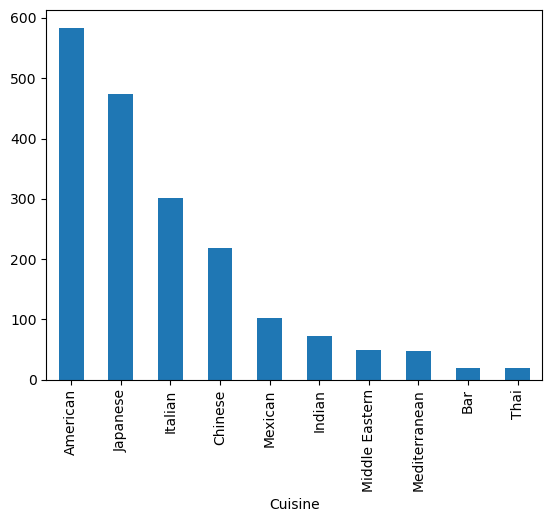

In [5]:
group = df_data.groupby('Cuisine').size()
top_5_cities=group.sort_values(ascending=False).head(10)
top_5_cities.plot.bar()

<Axes: xlabel='Review'>

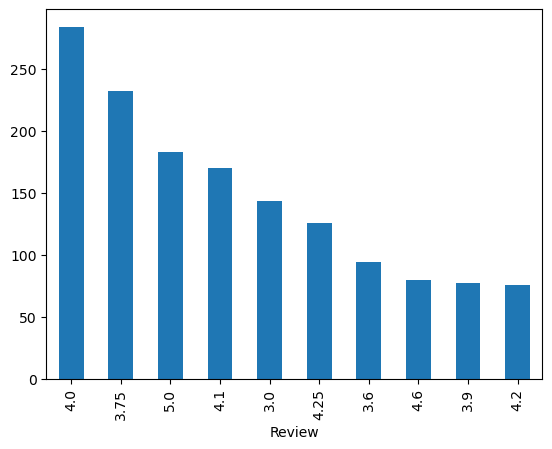

In [6]:
group = df_data.groupby('Review').size()
top_5_cities=group.sort_values(ascending=False).head(10)
top_5_cities.plot.bar()

In [7]:
plt.figure(figsize=(150,60))
data=df_data
sns.barplot (y='Review',x= 'Name', data=data)
plt.xticks (rotation=90)
plt.show()

In [8]:
df_data["Name"]

0                             Kiku Cuernavaca
1                             Puesto de tacos
2                  El Rincón de San Francisco
3              little pizza Emilio Portes Gil
4                               carnitas_mata
                        ...                  
2023    Chipotle Mexican Grill $1.99 Delivery
2024                                The Smile
2025                        Blue Ribbon Sushi
2026                        Jack's Wife Freda
2027                        Blue Ribbon Sushi
Name: Name, Length: 2028, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [10]:
tfidf=TfidfVectorizer(stop_words="english")
tf_matL=tfidf.fit_transform(df_data["Location"])
tf_matC=tfidf.fit_transform(df_data["Cuisine"])

In [11]:
cos_simL=linear_kernel(tf_matL,tf_matL)
cos_simC=linear_kernel(tf_matC,tf_matC)

In [12]:
cos_simC

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [13]:
cos_simL

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
indices=pd.Series(df_data.index, index=df_data["Name"]).drop_duplicates()

In [15]:
indices

Name
Kiku Cuernavaca                             0
Puesto de tacos                             1
El Rincón de San Francisco                  2
little pizza Emilio Portes Gil              3
carnitas_mata                               4
                                         ... 
Chipotle Mexican Grill $1.99 Delivery    2023
The Smile                                2024
Blue Ribbon Sushi                        2025
Jack's Wife Freda                        2026
Blue Ribbon Sushi                        2027
Length: 2028, dtype: int64

In [17]:
def get_recLoc(Loc,cos_simL=cos_simL):
    idx=indices[Loc]
    sin_score=enumerate(cos_simL[idx])
    sin_score=sorted(sin_score, key=lambda x: x[1], reverse=True)
    sin_score= sin_score[1:11]
    sin_id=[i[0] for i in sin_score]
    print(df_data["Name"].iloc[sin_id])

In [18]:
get_recLoc('Puesto de tacos')

131                Blue Ribbon Sushi Izakaya
686                         ilili Restaurant
1037                          Nobu Next Door
1167           Blue Ribbon Sushi Bar & Grill
1706                       Blue Ribbon Sushi
47      Restaurant Bar Hacienda los Martinez
334                              Han Dynasty
425                Blue Ribbon Fried Chicken
516                Blue Ribbon Fried Chicken
602                           Osteria Morini
Name: Name, dtype: object


In [19]:
def get_recCus(Cus,cos_simL=cos_simL):
    idx=indices[Cus]
    sin_score=enumerate(cos_simC[idx])
    sin_score=sorted(sin_score, key=lambda x: x[1], reverse=True)
    sin_score= sin_score[1:11]
    sin_id=[i[0] for i in sin_score]
    print(df_data["Name"].iloc[sin_id])

In [20]:
get_recCus('Puesto de tacos')

79     Restaurante la Cantina
118        Gorditas Dona Tota
123     la perica hamburguesa
136         The Meatball Shop
156         The Meatball Shop
157     Otto Enoteca Pizzeria
158    Vezzo Thin Crust Pizza
164                      Parm
167         The Meatball Shop
175         The Meatball Shop
Name: Name, dtype: object
